In [63]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)

Non-parametric methods use a generic learning function of the form

$$
f_\mathcal{G}(\mathbf{x}|\mathbf{c}) = \sum_{i=1}^{n}c_iG(\mathbf{x}-\mathbf{x_i}) = \sum_{i=1}^{n}c_i\gamma_i(x)
$$

Where G is a symmetric kernel function which is used to generate a generic basis function $\gamma_i$ for every data point $\mathbf{x_i}$. Unlike a polynomial basis, these kernels are localized, e.g., A Gaussian kernel $G(\mathbf(x)) = exp(||\mathbf{x}||^2/\sigma)$, limiting the influence of each basis function to a subregion of the input space. This enables the non-parametric model to accurately fit the training data from a wide variety of systems. However, non-parametric models have up to n degrees of freedom which makes them very prone to over-fitting.

In [55]:
def gaussian_kernel(x, xi, sigma=1):
    """
    The gaussian kernel G(x-xi) = (1/(sqrt(2pi)*sigma))*e^(-0.5||x||^2)
    """
    x = np.atleast_2d(x)
    xi = np.atleast_2d(xi)
    sq_norm = -0.5 * spatial.distance.cdist(x, xi, 'sqeuclidean')
    return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(sq_norm/sigma**2)

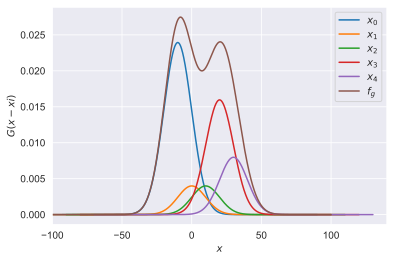

In [86]:
fig, ax = plt.subplots()
sigma=10
xc = [-10, 0, 10, 20, 30]
ci = [0.6, 0.1, 0.1, 0.4, 0.2]
x_pred = np.linspace(-100, 100, 1000).reshape(-1, 1)
f_g = []
for i, (x_i, c_i) in enumerate(zip(xc, ci)):
    x = np.linspace(x_i-10*sigma, x_i+10*sigma, 1000).reshape(-1, 1)
    g_x = c_i*gaussian_kernel(x, x_i, sigma=sigma)
    f_g += [c_i * gaussian_kernel(x_pred, x_i, sigma=sigma)]
    ax.plot(x, g_x, label=f'$x_{i}$')
f_g = np.sum(f_g, axis=0)
ax.plot(x_pred, f_g, label=r'$f_g$')
ax.set_xlim((-100, 140))
ax.set_xlabel(f'$x$')
ax.set_ylabel(f'$G(x-xi)$')
ax.legend()

Regularization (also known as ridge regression) reduces over-fitting by introducing a 'statistical-insight' to the GLM, namely: smooth predicitons tend to generalie better to unseen data. To regularize a GLM, the parameters are optimized by minimizing a regularized error metric:

$$
Criterion_{Ridge} = \sum_{i=1}^{n}(y_i-x_i^T\beta)^2 + \lambda \sum_{j=1}^p\beta_j^2 
$$

where 

 - $p=$ the amount of covariables used in the model
 - $x_i^T\beta = $ your standard linear predictor
 - the first summand respresents the MSE (squared divergence of the prediction from the actual value) that we want to minimize as usual 
 - the second summand represents the penalization we apply on the coefficients. Here we are in the Ridge-context which implies a Euclidian Distance Measure and therefore the degree of 2 in the penalization term. In the case of a Lasso-Penalization we would apply a degree of 1 and yield a totally different estimator.
 
We can rewrite this criterion in matrix-notation and further break it down: 

$Criterion_{Ridge} = (y-X\beta)^T(y-X\beta) + \lambda\beta^T\beta$

$ = y^Ty - \beta^TX^Ty - y^TX\beta+ \beta^Tx^TX\beta + \lambda\beta^T\beta$

$ = y^Ty - \beta^TX^Ty - \beta^TX^Ty + \beta^TX^TX\beta + \beta^T\lambda I\beta$  with $I$ being the identity matrix

$ = y^Ty - 2\beta^TX^Ty + \beta^T(X^TX + \lambda I)\beta$

Now we search for the $\beta$ that minimizes our criterion. Amongst others we make use of the matrix differentiation rule

$
\frac{\partial x^TAx}{\partial x} = (A+A^T)x \overset{\text{A symmetric}}{=} 2Ax$

which we can apply here as

$(X^TX + \lambda I) \in \mathbb{R}^{n \times n}$

$\frac{\partial Criterion_{Ridge} }{\partial\beta} =  -2X^Ty + 2(X^TX + \lambda I)\beta \overset{!}{=}0$

$(X^TX + \lambda I)\beta = X^Ty$ 

$\overset{\text{et voilà}}{\Rightarrow} \hat\beta = (X^TX + \lambda I)^{-1} X^Ty$
